### Useful Links

- Concepts:
    - Namespace: https://www.mediawiki.org/wiki/Manual:Namespace
- APIs
    - Rest: https://en.wikipedia.org/api/rest_v1/#/Recommendation
    - **MediaWiki API Query Module**: 
        - Link: https://www.mediawiki.org/w/api.php?action=help&modules=query
        - Annotated: http://marker.to/s6TXke
        - Parameters:
            - Attributes (description of each page, each attribute also has parameters):
                - Contributors: https://www.mediawiki.org/w/api.php?action=help&modules=query%2Bcontributors
                - External links: https://www.mediawiki.org/w/api.php?action=help&modules=query%2Bextlinks
                - Revisions: https://www.mediawiki.org/w/api.php?action=help&modules=query%2Brevisions
            - Generators:
                - **Category members**: https://www.mediawiki.org/wiki/API:Categorymembers
                - All pages: https://www.mediawiki.org/w/api.php?action=help&modules=query%2Ballpages
                - All categories: https://www.mediawiki.org/wiki/API:Allcategories
- pywikibot
    - Doc: https://doc.wikimedia.org/pywikibot/master/index.html
    - `user-config.py`: https://www.mediawiki.org/wiki/Manual:Pywikibot/user-config.py

In [1]:
import requests
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

Descriptions of properties:
- `categories`: List all categories the pages belong to.
- `contributors`: Get the list of logged-in contributors and the count of anonymous contributors to a page.
- `extlinks`: Returns all external URLs (not interwikis) from the given pages.
- `iwlinks`: Returns all interwiki links from the given pages.
- `links`: Returns all links from the given pages.
- `linkshere`: Find all pages that link to the given pages.

Current plan
- Get a category without subcategories, and see what the response is like
- Design base case
- Design recursive case

In [214]:
def get_media_wiki_request(params):
    url = "http://en.wikipedia.org/w/api.php/"
    return requests.get(url, params=params)

In [215]:
def get_param_with_category(category):
    params = {'action':'query', 
              'prop':'',
              'generator':'categorymembers',
              'gcmtitle':'{}'.format(category),
              'gcmlimit':500,
              'gcmtype':'subcat',
              'format':'json'}
    return params

In [216]:
level = 0

In [217]:
irrelevant_cats = set(['Category:Medical activism', 
                       'Category:Medical associations', 
                       'Category:Medical culture', 
                       'Category:Medical education', 
                       'Category:Health insurance', 
                       'Category:Works about medicine', 
                       'Category:Medicine stubs'])

In [218]:
def get_categories_recursive(category, depth):
    for i in range(depth):
        print('-', end='')
    print('', category)
    
    subcats_recursive = []
    json = get_media_wiki_request(get_param_with_category(category)).json()
    if 'query' not in json.keys() or depth == 3:
        return [category]
    else:
        for profile in json['query']['pages'].values():
            if profile['title'] not in irrelevant_cats:
                subcats_recursive.extend(get_categories_recursive(profile['title'], depth+1))
        subcats_recursive.append(category)
        print(subcats_recursive)
        return subcats_recursive

In [219]:
categories = list(set(get_categories_recursive('Category:Medicine', 1)))

- Category:Medicine
-- Category:Clinical medicine
--- Category:Diseases and disorders
--- Category:Medical diagnosis
--- Category:Medical specialties
--- Category:Medical tests
--- Category:Medical treatments
--- Category:Reference intervals
--- Category:Symptoms and signs
['Category:Diseases and disorders', 'Category:Medical diagnosis', 'Category:Medical specialties', 'Category:Medical tests', 'Category:Medical treatments', 'Category:Reference intervals', 'Category:Symptoms and signs', 'Category:Clinical medicine']
-- Category:Medical specialties
--- Category:History of medical and surgical specialties
--- Category:Medical doctors by specialty
--- Category:Medical and health organizations by medical specialty
--- Category:Interdisciplinary subfields of medicine
--- Category:Addiction medicine
--- Category:Andrology
--- Category:Anesthesiology
--- Category:Angiology
--- Category:Audiology
--- Category:Aviation medicine
--- Category:Bacteriology
--- Category:Biomedicine
--- Category:Car

--- Category:Causes of autism
['Category:Causes of autism', 'Category:Etiology']
-- Category:Intersex and medicine
--- Category:Intersex medical and health organizations
['Category:Intersex medical and health organizations', 'Category:Intersex and medicine']
-- Category:Medical aspects of death
--- Category:Forensics
--- Category:Necrosis
--- Category:Programmed cell death
--- Category:Signs of death
['Category:Forensics', 'Category:Necrosis', 'Category:Programmed cell death', 'Category:Signs of death', 'Category:Medical aspects of death']
-- Category:Medical monitoring
--- Category:Medical monitoring equipment
['Category:Medical monitoring equipment', 'Category:Medical monitoring']
-- Category:Medical phenomena
--- Category:Healing
['Category:Healing', 'Category:Medical phenomena']
-- Category:Practice of medicine
--- Category:Medical credentials
--- Category:Medical licensing boards
--- Category:Patient
--- Category:Physicians
['Category:Medical credentials', 'Category:Medical licens

In [246]:
print(len(categories))

221


In [2]:
with h5py.File('dataset.h5', 'w') as hf:
    dt = h5py.special_dtype(vlen=str)
    data_1 = hf.create_dataset("categories", (221,), dtype=dt)
    data_1[:] = categories

NameError: name 'categories' is not defined

In [154]:
with h5py.File('../midterm-report/dataset.h5', 'r') as hf:
    categories = hf['categories'][:]

In [155]:
categories

array(['Category:Medical technology companies',
       'Category:Veterinary medicine', 'Category:Medical journalism',
       'Category:Veterinary parasitology', 'Category:Infectious diseases',
       'Category:Dentistry', 'Category:Animal health',
       'Category:Practice of medicine', 'Category:Religion and medicine',
       'Category:Space medicine', 'Category:Sexual health',
       'Category:Mathematics in medicine', 'Category:Veterinary oncology',
       'Category:Drugs', 'Category:Veterinary professions',
       'Category:Pulmonology', 'Category:Sports medicine',
       'Category:Programmed cell death', 'Category:Medical devices',
       'Category:Lists of medical eponyms', 'Category:Medicine in art',
       'Category:Latin medical words and phrases',
       'Category:Intersex and medicine', 'Category:Medical researchers',
       'Category:Medical bibliographies', 'Category:Prodrugs',
       'Category:Signs of death', 'Category:Anatomical terminology',
       'Category:Fistulas',

In [190]:
url = "http://en.wikipedia.org/w/api.php/"
params = {'action':'query', 
                       'prop':'pageviews|extlinks',
                       'pvipdays':60,
                       'ellimit':500,
                       'generator':'categorymembers',
                       'gcmtitle':'{}'.format('Category:Medicine'),
                       'gcmlimit':500,
                       'gcmtype':'page',
                       'format':'json'}
 
print('batchcomplete' in requests.get(url, params=params).json())

True


### First-pass: Obtain an ORES score for an article

<img src='ores.png' width=300>

- ORES description and tutorial: https://www.mediawiki.org/wiki/ORES, http://marker.to/WkgmOQ
- ORES FAQs: https://www.mediawiki.org/wiki/ORES/FAQ

In [125]:
def get_ores_score(revision_ids):
    """
    Obtain the ORES (Objective Revision Evaluation Service) evaluation on a revision.
    
    param: revid: revision id(s) of one or more articles, splitted by "|", e.g., "871521672|873049882"
    type: revid: int for one revision id, str for one or more revision ids
    return: quality (FA, FL, A, GA, B, C, Start or Stub)
    """
    link = f'https://ores.wmflabs.org/v3/scores/enwiki/?models=articlequality&revids={revision_ids}'
    request = requests.get(link)
    json = request.json()
    
    if type(revision_ids) == int:
        revision_ids = str(revision_ids)  # int does not have split methods; they need to be converted to str
        
    qualities = []
    for key in revision_ids.split('|'):
        qualities.append(json['enwiki']['scores'][key]['articlequality']['score']['prediction'])
        
    return qualities

In [126]:
get_ores_score(879498945)

['Stub']

### First-pass: Request the most recent revision id for a page

In [203]:
test1_category = 'Category:Biomedicine'
test1_url = "http://en.wikipedia.org/w/api.php/"
test1_params = {'action':'query', 
           'prop':'revisions',
           'rvprop':'ids',
           'generator':'categorymembers',
           'gcmtitle':f'{category}',
           'gcmlimit':500,
           'gcmtype':'page',
           'format':'json'}

In [204]:
test1_request = requests.get(test_url, params=test_params)
test1_json = test_request.json()

In [205]:
revids = []
for i in test_json['query']['pages'].values():
    revids.append(i['revisions'][0]['revid']) 

# concatenating all revids allow all scores to be requested at once
revids_string = ''
for i in revids:
    revids_string += str(i) + '|'
revids_string = revids_string[:-1]
print('* revids string:', revids_string)

print('* articlequalities:', get_ores_score(revids_string))

* revids string: 887954664|884797447|898308277|886170253|884527799|877084813|873575063|895492723|887669614|878271254|887553462|891718147|878234084|895028648
* articlequalities: ['C', 'B', 'Stub', 'B', 'Stub', 'C', 'Start', 'C', 'Start', 'B', 'B', 'B', 'C', 'Start']


### ORESRequest Class

In [ ]:
class ORESRequest:
    
    def __init__(self, category):
        

### MediaWikiRequest Class

In [169]:
class MediaWikiRequest():
    
    def __init__(self, category, option):
        self.url = "http://en.wikipedia.org/w/api.php/"
        if option == 1:
            self.params = {'action':'query', 
                           'prop':'pageviews|extlinks',
                           'pvipdays':60,
                           'ellimit':500,
                           'generator':'categorymembers',
                           'gcmtitle':'{}'.format(category),
                           'gcmlimit':500,
                           'gcmtype':'page',
                           'format':'json'}
        elif option == 2:
            self.params = {'action':'query', 
                           'prop':'revisions',
                           'rvprop':'ids',
                           'generator':'categorymembers',
                           'gcmtitle':f'{category}',
                           'gcmlimit':500,
                           'gcmtype':'page',
                           'format':'json'}
        self.current_json = None
        
    def get_json(self, url, params):
        resp = requests.get(url, params=params) 
        return resp.json()

    @property
    def continues(self):
        return self.current_json['continue']
    
    @property
    def complete(self):
        return 'batchcomplete' in self.current_json.keys()
    
    @staticmethod
    def merge_jsons(json_1, json_2):
        for page_id, attribute_value in json_2['query']['pages'].items():
            for attribute, value in attribute_value.items():
                
                if page_id in json_1['query']['pages'].keys(): # if the page has been fetched
                
                    if attribute not in ['pageid', 'ns', 'title']: # properties that do not need iteration
                        if attribute in json_1['query']['pages'][page_id].keys():
                            if isinstance(json_1['query']['pages'][page_id][attribute], int):
                                json_1['query']['pages'][page_id][attribute] += value
                            else:
                                json_1['query']['pages'][page_id][attribute].append(value)
                        else:
                            json_1['query']['pages'][page_id][attribute] = value
                            
                else: # if the page has not been fetched
                    json_1['query']['pages'][page_id] = attribute_value
                            
        return json_1
    
    def get_final_json(self):
        
        self.current_json = self.get_json(self.url, self.params)
        counter = 1
        while not self.complete: #not np.all([seed == '||' for seed in self.continues.values()]):
            # merge initial parameters and new parameters for continuing
            
            new_params = {**self.params, **self.continues}
            print(counter, new_params)
            new_json = self.get_json(self.url, new_params)
            
            # merge old and new jsons
            self.current_json = self.merge_jsons(self.current_json, new_json)
            
            if 'continue' not in new_json.keys():
                return self.current_json
            self.current_json['continue'] = new_json['continue']
        
            counter += 1
        return self.current_json

In [172]:
revids_per_category = []
for category in categories:
    scraper = MediaWikiRequest(category, option=2)
    revids = scraper.get_final_json()
    revids_per_category.append([] if revids is None else revids)
    print(len(revids_per_category), 'categories done ', end='|')

1 categories done |2 categories done |3 categories done |4 categories done |5 categories done |6 categories done |7 categories done |8 categories done |9 categories done |10 categories done |11 categories done |12 categories done |13 categories done |14 categories done |15 categories done |16 categories done |17 categories done |18 categories done |19 categories done |20 categories done |21 categories done |22 categories done |23 categories done |24 categories done |25 categories done |26 categories done |27 categories done |28 categories done |29 categories done |30 categories done |31 categories done |32 categories done |33 categories done |34 categories done |35 categories done |36 categories done |37 categories done |38 categories done |39 categories done |40 categories done |41 categories done |42 categories done |43 categories done |44 categories done |45 categories done |46 categories done |47 categories done |48 categories done |49 categories done |50 categories done |51 catego

In [175]:
revids_per_category[0]

{'batchcomplete': ''}

In [288]:
page_ids = []
revids = []

for data in revids_per_category:
    if data != [] and 'query' in data.keys():
        for page_data in data['query']['pages'].values():
            page_ids.append(page_data['pageid'])
            revids.append(page_data['revisions'][0]['revid'])

In [289]:
len(revids)

11803

In [290]:
def lst2strng(lst):
    strng = ''
    for i in lst:
        strng += str(i) + '|'
    strng = strng[:-1]
    return strng

In [292]:
def get_ores_scores_for_revids(revids):
    batch_size = 140
    print(len(revids) / batch_size)
    ores_scores = []
    counter = 0
    batch_counter = 0
    while len(revids) - counter >= batch_size:
        ores_scores.extend(get_ores_score(lst2strng(revids[counter:counter + batch_size])))
        counter += batch_size
        batch_counter += 1
        print(f'batch {batch_counter} finished')
    ores_scores.extend(get_ores_score(lst2strng(revids[counter:])))
    return ores_scores

In [293]:
ores_scores = get_ores_scores_for_revids(revids)

84.30714285714286
batch 1 finished
batch 2 finished
batch 3 finished
batch 4 finished
batch 5 finished
batch 6 finished
batch 7 finished
batch 8 finished
batch 9 finished
batch 10 finished
batch 11 finished
batch 12 finished
batch 13 finished
batch 14 finished
batch 15 finished
batch 16 finished
batch 17 finished
batch 18 finished
batch 19 finished
batch 20 finished
batch 21 finished
batch 22 finished
batch 23 finished
batch 24 finished
batch 25 finished
batch 26 finished
batch 27 finished
batch 28 finished
batch 29 finished
batch 30 finished
batch 31 finished
batch 32 finished
batch 33 finished
batch 34 finished
batch 35 finished
batch 36 finished
batch 37 finished
batch 38 finished
batch 39 finished
batch 40 finished
batch 41 finished
batch 42 finished
batch 43 finished
batch 44 finished
batch 45 finished
batch 46 finished
batch 47 finished
batch 48 finished
batch 49 finished
batch 50 finished
batch 51 finished
batch 52 finished
batch 53 finished
batch 54 finished
batch 55 finished
b

In [294]:
ores_scores

['C',
 'Start',
 'C',
 'C',
 'B',
 'C',
 'B',
 'Start',
 'C',
 'Stub',
 'Start',
 'Start',
 'Stub',
 'Start',
 'Stub',
 'Stub',
 'Stub',
 'C',
 'Start',
 'Stub',
 'C',
 'Start',
 'Start',
 'Stub',
 'C',
 'Stub',
 'C',
 'Stub',
 'C',
 'Start',
 'Start',
 'Stub',
 'Start',
 'Start',
 'Start',
 'C',
 'GA',
 'C',
 'C',
 'Stub',
 'Stub',
 'Start',
 'Stub',
 'Stub',
 'Stub',
 'Stub',
 'Stub',
 'Stub',
 'Stub',
 'Start',
 'Start',
 'GA',
 'Stub',
 'Stub',
 'Stub',
 'Stub',
 'B',
 'Stub',
 'C',
 'FA',
 'Stub',
 'Start',
 'GA',
 'C',
 'B',
 'Start',
 'B',
 'Start',
 'Start',
 'Stub',
 'C',
 'Start',
 'Start',
 'B',
 'C',
 'C',
 'Stub',
 'C',
 'C',
 'C',
 'Start',
 'Stub',
 'Start',
 'FA',
 'Start',
 'GA',
 'B',
 'GA',
 'Stub',
 'Start',
 'GA',
 'B',
 'C',
 'B',
 'Stub',
 'Stub',
 'C',
 'Start',
 'Start',
 'C',
 'GA',
 'Stub',
 'Start',
 'Start',
 'Start',
 'GA',
 'Stub',
 'B',
 'Stub',
 'B',
 'Start',
 'FA',
 'Start',
 'Start',
 'B',
 'FA',
 'Stub',
 'B',
 'Start',
 'GA',
 'GA',
 'Stub',
 'C',


In [295]:
page_ids

[32654,
 9996777,
 1524906,
 23640750,
 1914,
 55868631,
 40364158,
 15638499,
 1043627,
 41288994,
 33010087,
 1453457,
 1370289,
 59409979,
 5939070,
 4276018,
 342474,
 31155073,
 8915378,
 2056625,
 21918942,
 23104148,
 41997351,
 2383703,
 12623169,
 23607890,
 30856302,
 43104215,
 56263618,
 26468653,
 26699353,
 13436654,
 26932524,
 20531790,
 29302533,
 22175792,
 1174316,
 390491,
 43147,
 21682560,
 6780737,
 33354679,
 50455544,
 50455549,
 50455551,
 50455555,
 50455558,
 50455562,
 50455564,
 1864513,
 51992088,
 52390011,
 10017079,
 48785125,
 48785133,
 48785132,
 1885553,
 48785127,
 40496567,
 1849824,
 16720165,
 17488798,
 3826067,
 1882715,
 33894099,
 33980768,
 37220,
 14613,
 1401706,
 40763725,
 16057614,
 543406,
 13564008,
 2943640,
 679680,
 43943599,
 28227276,
 320355,
 3840,
 54329819,
 51885500,
 1249388,
 1990971,
 5544827,
 648640,
 2913317,
 1166041,
 51303,
 14490284,
 8329048,
 18766553,
 4106560,
 39900219,
 37636,
 51924642,
 56366877,
 1480314

In [266]:
data_per_category = []
for category in categories:
    scraper = MediaWikiRequest(category)
    data = scraper.get_final_json()
    data_per_category.append([] if data is None else data)
    print(len(data_per_category), 'categories done!')

1 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'elcontinue': '1043627|http://gov.fda.www./MedicalDevices/ProductsandMedicalProcedu|47036956', 'continue': '||pageviews'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'elcontinue': '40364158|https://org.nrdc.www./stories/hurricane-flooded-hog-farms-co|461703166', 'continue': '||pageviews'}
2 categories done!
3 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary parasitology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'elcontinue': '51992088|http://org.doi./10.1016/030

5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Sexual health', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Shenkui', 'elcontinue': '22287305|http://org.doi./10.1099%252Fijs.0.2008%252F005074-0|442500417', 'continue': '||'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Sexual health', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Tax_on_feminine_hygiene_products', 'elcontinue': '35409254|http://org.doi./10.1046%252Fj.1464-410X.2003.04026.x|421971324', 'continue': '||'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Sexual health', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Veillonella_parvula', 'elcontinue': '56040019|https://gov.cdc.www./

8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pulmonology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Phthisiology', 'continue': '||extlinks'}
9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pulmonology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Pulmonology', 'continue': '||extlinks'}
10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pulmonology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Respiratory_sounds', 'continue': '||extlinks'}
11 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pulmonology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'js

12 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Programmed cell death', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'UVB-induced_apoptosis', 'elcontinue': '17062920|http://gov.nih.nlm.ncbi.www./pubmed/23637614|290759597', 'continue': '||'}
18 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical devices', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': "Ashley_Black's_FasciaBlaster", 'elcontinue': '241649|https://gov.nih.report./nihfactsheets/ViewFactSheet.aspx?csi|416738121', 'continue': '||'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical devices', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Continuous_glucose_monito

7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Intersex and medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Hypogonadism', 'elcontinue': '41589664|https://com.forbes.www./sites/leeigel/2015/06/02/on-top-of-c|307148801', 'continue': '||'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Intersex and medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'John_Money', 'continue': '||extlinks'}
9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Intersex and medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'List_of_researchers_on_intersex', 'continue': '||extlinks'}
10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'el

18 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Prodrugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Combretastatin_A-4_phosphate', 'elcontinue': '35885434|http://org.doi./10.1016%252F0002-9378(71)90268-7|432756253', 'continue': '||'}
19 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Prodrugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cortisone_acetate', 'elcontinue': '44362670|https://gov.nih.nlm.ncbi.pubchem./compound/60017|270501627', 'continue': '||'}
20 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Prodrugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cytestrol_acetate', 'elcontinue': '50790968|http://gov.nih.nlm.ncbi.www./pubmed/

48 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Prodrugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Methyltestosterone_3-hexyl_ether', 'continue': '||extlinks'}
49 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Prodrugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Moexipril', 'continue': '||extlinks'}
50 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Prodrugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Nepafenac', 'continue': '||extlinks'}
51 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Prodrugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'jso

28 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Fistulas', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Oroantral_fistula', 'continue': '||extlinks'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Fistulas', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Urethrovaginal_fistula', 'continue': '||extlinks'}
29 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Philosophy of medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'The_Enigma_of_Health', 'continue': '||extlinks'}
30 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcm

4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Rehabilitation medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Geriatric_rehabilitation', 'continue': '||extlinks'}
5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Rehabilitation medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Marche_à_petit_pas', 'continue': '||extlinks'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Rehabilitation medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Oral_myology', 'continue': '||extlinks'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Rehabilitation m

7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical equipment', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Bubble_sensor', 'elcontinue': '24587308|https://org.healthnewsreview.www./2018/03/lifevest-study-res|369750599', 'continue': '||'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical equipment', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cardiopulmonary_bypass', 'elcontinue': '39261916|http://gov.nih.nlm.ncbi.www./pubmed/11124837|63180232', 'continue': '||'}
9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical equipment', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Compression_garment', 'elcontinue': '49821898|https://com.y

36 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical equipment', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Nanoneedle', 'continue': '||extlinks'}
37 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical equipment', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Nd:YAG_laser', 'continue': '||extlinks'}
38 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical equipment', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Obstetrical_forceps', 'continue': '||extlinks'}
39 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical equipment', 'gcmlimit': 500, 'gcmty

4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Nuclear medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'PET_response_criteria_in_solid_tumors', 'continue': '||extlinks'}
5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Nuclear medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Therac-25', 'continue': '||extlinks'}
40 categories done!
41 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Alternative medical systems', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Dosha', 'continue': '||extlinks'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle':

15 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Intensive care medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Stress_ulcer', 'continue': '||extlinks'}
16 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Intensive care medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Template:Intensive_care_medicine', 'continue': '||extlinks'}
17 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Intensive care medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Vasodilatory_shock', 'continue': '||extlinks'}
45 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtit

10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Biomedical engineering', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Porous_silicon', 'continue': '||extlinks'}
11 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Biomedical engineering', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'SENSE_lab', 'continue': '||extlinks'}
12 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Biomedical engineering', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Stent-electrode_recording_array', 'continue': '||extlinks'}
13 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Biomedical engi

18 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Pirlimycin', 'continue': '||extlinks'}
19 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Proligestone', 'continue': '||extlinks'}
20 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Selamectin', 'continue': '||extlinks'}
21 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary drugs', 'gcmlimit': 500, 'gcmtype': 'page', 

8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Public health', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Medical_Officer_of_Health', 'continue': '||extlinks'}
9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Public health', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Polizeiwissenschaft', 'continue': '||extlinks'}
10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Public health', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Public_health_informatics', 'continue': '||extlinks'}
11 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Public health', 'gcmlimit': 5

24 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Cardiology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Rhythm_interpretation', 'continue': '||extlinks'}
25 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Cardiology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'SFHAM', 'continue': '||extlinks'}
26 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Cardiology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Sonographer', 'continue': '||extlinks'}
27 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Cardiology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', '

7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Nephrology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Hypomagnesemia_with_secondary_hypocalcemia', 'continue': '||extlinks'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Nephrology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Kidney_failure', 'continue': '||extlinks'}
9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Nephrology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Microangiopathic_hemolytic_anemia', 'continue': '||extlinks'}
10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Nephrology', 'gcmli

5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Ophthalmology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Chinese_Ophthalmology', 'elcontinue': '47881061|http://org.doi./10.1001%252Farchopht.116.12.1681|434924308', 'continue': '||'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Ophthalmology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Congenital_cataract', 'continue': '||extlinks'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Ophthalmology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cover_test', 'continue': '||extlinks'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembe

3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal testing', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Behind_the_Mask_(2006_film)', 'elcontinue': '5146562|http://uk.org.thepeoplespetition.www./|1355919', 'continue': '||'}
4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal testing', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Captive_Primate_Safety_Act', 'elcontinue': '14668445|http://uk.co.official-documents.archive.www./document/hoc/32|8304994', 'continue': '||'}
5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal testing', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Collagen-induced_arthritis', 'elcontinue': '49083018|http://

6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Life extension', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Shangri-La', 'continue': '||extlinks'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Life extension', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Siming_(deity)', 'continue': '||extlinks'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Life extension', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'What_the_Dead_Men_Say', 'continue': '||extlinks'}
75 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Tissue engineering', 'gcmlimit':

19 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Health informatics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'MEDCIN', 'continue': '||extlinks'}
20 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Health informatics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Medical_algorithm', 'continue': '||extlinks'}
21 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Health informatics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Medical_logic_module', 'continue': '||extlinks'}
22 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Health informatics', 'gcmlimit': 500, 

9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Transplantation medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Nicholas_Green', 'continue': '||extlinks'}
10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Transplantation medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Spray-on_skin', 'continue': '||extlinks'}
11 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Transplantation medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Transplant_rejection', 'continue': '||extlinks'}
80 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Categor

4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Stem cell research', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Lana_Skirboll', 'continue': '||extlinks'}
5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Stem cell research', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Robert_N._Klein_II', 'continue': '||extlinks'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Stem cell research', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Society_for_Hematology_and_Stem_Cells', 'continue': '||extlinks'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Stem cell researc

9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Toxicology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'EC50', 'elcontinue': '55137260|http://org.doi./10.1016%252FS1081-1206(10)60335-3|424465991', 'continue': '||'}
10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Toxicology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Entomotoxicology', 'continue': '||extlinks'}
11 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Toxicology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Evidence-based_toxicology', 'continue': '||extlinks'}
12 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmt

3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical controversies', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Controversies_related_to_chronic_fatigue_syndrome', 'elcontinue': '196741|http://com.scmp.www./article/410652/inside-hospital-where-pa|384190328', 'continue': '||'}
4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical controversies', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Fatal_Misconception', 'elcontinue': '244113|http://org.jimmunol.www./cgi/pmidlookup?view=long&pmid=17404|470139223', 'continue': '||'}
5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical controversies', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'I

12 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical treatments', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Heliox', 'elcontinue': '51305509|http://gov.nih.nlm.ncbi.www./pubmed/17945127|469320381', 'continue': '||'}
13 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical treatments', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Hydrodilatation', 'continue': '||extlinks'}
14 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical treatments', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Hypnosis', 'continue': '||extlinks'}
15 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', '

3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Angiology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Basement_membrane', 'elcontinue': '15181752|http://gov.nih.nlm.ncbi.www./pubmed/21197102|92994065', 'continue': '||'}
4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Angiology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Capillary_lamina_of_choroid', 'continue': '||extlinks'}
5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Angiology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cirsoid_aneurysm', 'continue': '||extlinks'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'g

12 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Neurology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Nerve_guidance_conduit', 'continue': '||extlinks'}
13 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Neurology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Neural_ensemble', 'continue': '||extlinks'}
14 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Neurology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Neuroeffector_junction', 'continue': '||extlinks'}
15 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Neurology', 'gcmlimit': 500, 'gcmtype': 'page', '

16 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal anatomy', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Polycerate', 'continue': '||extlinks'}
17 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal anatomy', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Pseudoruminant', 'continue': '||extlinks'}
18 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal anatomy', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Savannah_hypothesis', 'continue': '||extlinks'}
19 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal anatomy', 'gcmlimit': 500, 'gcmtype': 'page

2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Biological engineering', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Biomimetics', 'elcontinue': '1585648|http://in.ac.ias.www./describe/article/reso/021/03/0233-0237|194757124', 'continue': '||'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Biological engineering', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Biotextile', 'elcontinue': '2146034|http://org.doi./10.1016%252Fj.mib.2017.05.008|430421662', 'continue': '||'}
4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Biological engineering', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cellular_agriculture', 'elcontinue': '6313537|https://com.

13 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical lists', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Native_American_ethnobotany', 'continue': '||extlinks'}
14 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical lists', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Pontiac_fever', 'continue': '||extlinks'}
107 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Religion and HIV/AIDS', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Tapologo', 'continue': '||extlinks'}
108 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:

24 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical terminology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Extravasation_(intravenous)', 'continue': '||extlinks'}
25 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical terminology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Fulminant', 'continue': '||extlinks'}
26 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical terminology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Giant_pelvis', 'continue': '||extlinks'}
27 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical terminology', 'gcmlimi

54 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical terminology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Stenochoria', 'continue': '||extlinks'}
55 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical terminology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Surgical_sieve', 'continue': '||extlinks'}
56 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical terminology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Systemic_disease', 'continue': '||extlinks'}
57 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical terminology', 'gcmlimit': 500

2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal virology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Animal_Health_and_Welfare_Act_1984', 'elcontinue': '442916|http://org.eurosurveillance.www./ViewArticle.aspx?ArticleId=|53197837', 'continue': '||'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal virology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Avian_nephritis_virus', 'elcontinue': '1516915|http://gov.nih.nlm.ncbi.www./pubmed/19388722|110331629', 'continue': '||'}
4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal virology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Bat_SARS-like_coronavirus_WIV1', 'elcontinue': '

30 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal virology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Ungulate_bocaparvovirus_1', 'continue': '||extlinks'}
31 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal virology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Veterinary_virology', 'continue': '||extlinks'}
32 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal virology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Yellowhead_disease', 'continue': '||extlinks'}
112 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterina

27 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary medicine stubs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'State_Veterinary_Service', 'continue': '||extlinks'}
28 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary medicine stubs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Sweating_sickness_(cattle)', 'continue': '||extlinks'}
29 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary medicine stubs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Theriogenology', 'continue': '||extlinks'}
30 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Categ

4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:General practice', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'The_Waldron', 'continue': '||extlinks'}
118 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Dermatologic terminology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Atrophoderma', 'elcontinue': '2289967|http://org.doi./10.4103%252F0378-6323.53139|421565598', 'continue': '||'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Dermatologic terminology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Bruise', 'continue': '||extlinks'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generat

3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Twin studies', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Twin_study', 'continue': '||extlinks'}
121 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Alternative medicine stubs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Amy_Foxx-Orenstein', 'elcontinue': '22488521|https://org.orau.www./ptp/collection/quackcures/Revigator.ht|318530363', 'continue': '||'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Alternative medicine stubs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Balinese_massage', 'continue': '||extlinks'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipda

4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Obsolete medical terms', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Periodontosis', 'continue': '||extlinks'}
124 categories done!
125 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Diseases and disorders', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Degenerative_disease', 'elcontinue': '54779466|http://gov.nih.nlm.ncbi.www./pubmed/25587370|413492856', 'continue': '||'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Diseases and disorders', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Environmental_disease', 'continue': '||extlinks'}
3 {'action': 'query', 'prop': 'pageviews|e

128 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Alternative medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Aromatherapy', 'elcontinue': '1537|http://org.doi./10.3233%252FJRS-2012-0569|419758929', 'continue': '||'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Alternative medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'CEASE_therapy', 'elcontinue': '5992|http://gov.nih.nlm.ncbi.www./pmc/articles/PMC3781107|347602788', 'continue': '||'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Alternative medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Dorn_method', 'elcontinue': '74591|https://org.archive.we

134 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical software', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cybermed', 'elcontinue': '40852349|http://com.go.abcnews./Health/start-end-life-conversation/st|216904351', 'continue': '||'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical software', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Harding_test', 'continue': '||extlinks'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical software', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'List_of_exercise_prescription_software', 'continue': '||extlinks'}
4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays

7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pediatrics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Enterovirus_68', 'elcontinue': '895702|https://gov.fda.www./NewsEvents/Newsroom/PressAnnouncements/|438199154', 'continue': '||'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pediatrics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Fetus_in_fetu', 'elcontinue': '1402262|http://org.doi./10.1001%252Farchpedi.156.12.1172|421321810', 'continue': '||'}
9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pediatrics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Germinoma', 'elcontinue': '4292552|http://com.icd9data.www./getICD9Code.ashx?icd9=756.

4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary organizations', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Royal_Army_Veterinary_Corps', 'continue': '||extlinks'}
5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary organizations', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Swedish_Army_Veterinary_Corps', 'continue': '||extlinks'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Veterinary organizations', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Veterinary_Council_of_Ireland', 'continue': '||extlinks'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcm

2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical genetics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'DECIPHER', 'elcontinue': '3232713|http://gov.nih.nlm.ncbi.www./pubmed/12819446|276925164', 'continue': '||'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical genetics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Ensembl_Genomes', 'elcontinue': '4868935|http://org.doi./10.1023%252FA:1025388908177|420151646', 'continue': '||'}
4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical genetics', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Gene_therapy', 'elcontinue': '8610048|http://gov.nih.nlm.ncbi.www./pubmed/20113689|36650689'

11 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Oncology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'European_Prospective_Investigation_into_Cancer_and_Nutrition', 'elcontinue': '16806609|http://edu.harvard.adsabs./abs/2004PNAS..101.9393M|265211294', 'continue': '||'}
12 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Oncology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Flexner–Wintersteiner_rosette', 'elcontinue': '21438807|https://info.d-nb./gnd/4075658-0|322056640', 'continue': '||'}
13 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Oncology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Glycoprotein_100', 'elcontinue': '32819131|http://

155 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Theriogenology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Covering_sickness', 'elcontinue': '528976|http://org.doi./10.1006%252Fabbi.1993.1452|420648309', 'continue': '||'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Theriogenology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Episiotomy', 'elcontinue': '14368179|http://org.doi./10.1016%252Fj.vaccine.2005.07.007|421283129', 'continue': '||'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Theriogenology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Miscarriage', 'continue': '||extlinks'}
4 {'action': 'query', 'prop':

11 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pathology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Pathogenesis', 'continue': '||extlinks'}
12 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pathology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Plant_pathology', 'continue': '||extlinks'}
13 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pathology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Red_neuron', 'continue': '||extlinks'}
14 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Pathology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvip

4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical aspects of death', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Maternal_somatic_support_after_brain_death', 'continue': '||extlinks'}
5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical aspects of death', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Necroptosis', 'continue': '||extlinks'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical aspects of death', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Risk_adjusted_mortality_rate', 'continue': '||extlinks'}
164 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categ

10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Rheumatology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': "Poor_man's_gout", 'continue': '||extlinks'}
11 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Rheumatology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Remitting_seronegative_symmetrical_synovitis_with_pitting_edema', 'continue': '||extlinks'}
12 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Rheumatology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Rheumatoid_factor', 'continue': '||extlinks'}
13 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Rheu

2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Alternative diagnoses', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Sensory_processing_disorder', 'elcontinue': '46813512|https://org.archive.web./web/20110225143641/http://www.idsoc|398810497', 'continue': '||'}
179 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Mission hospitals', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Presbyterian_Hospital,_Durtlang', 'continue': '||extlinks'}
180 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Hematology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Atypical_localization_of_immature_precursors', 'elcontinue': '88857|h

6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Andrology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': "Men's_Health_Network", 'continue': '||extlinks'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Andrology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Reproductive_endocrinology_and_infertility', 'continue': '||extlinks'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Andrology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Testicular_immunology', 'continue': '||extlinks'}
9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Andrology', 'gcmlimit': 500, 

2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Experimental drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Abrilumab', 'elcontinue': '16185696|http://org.worldcat.www./issn/0033-3158|37077787', 'continue': '||'}
3 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Experimental drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Alanosine', 'elcontinue': '22725259|http://gov.nih.nlm.ncbi.www./pmc/articles/PMC2192362|203876204', 'continue': '||'}
4 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Experimental drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Anifrolumab', 'elcontinue': '35796613|http://com.chemspider.www./Chemical-Structure.28

30 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Experimental drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Leflutrozole', 'continue': '||extlinks'}
31 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Experimental drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'List_of_investigational_antipsychotics', 'continue': '||extlinks'}
32 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Experimental drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Lu_AA-33810', 'continue': '||extlinks'}
33 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Experimental drugs',

6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Lists of people by medical condition', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'List_of_people_with_hepatitis_C', 'elcontinue': '11400861|http://com.practicallyedible.www./edible.nsf/encyclopaedia!o|428527891', 'continue': '||'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Lists of people by medical condition', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'List_of_people_with_osteogenesis_imperfecta', 'elcontinue': '13954426|https://com.google.books./books?id=LhqaSmGih8QC|238368490', 'continue': '||'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Lists of people by medical condition', 'gcmlimit': 500, 'gcmtype': 'p

8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Bacteriology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cragie_tube', 'elcontinue': '16359310|http://gov.nih.nlm.ncbi.www./pubmed/22698087|370541417', 'continue': '||'}
9 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Bacteriology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Effective_(database)', 'elcontinue': '22938418|https://org.doi./10.1002%252Fcssc.201100733|331259693', 'continue': '||'}
10 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Bacteriology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Enterotype', 'elcontinue': '39821102|http://gov.nih.nlm.ncbi.www./pubmed/18709000|259347497',

5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Human drug metabolites', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': '7α-Thiomethylspironolactone', 'elcontinue': '48986530|https://com.google.books./books?id=8bLwBgAAQBAJ&pg=PA1156|468411771', 'continue': '||'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Human drug metabolites', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Acecainide', 'elcontinue': '56970119|http://gov.nih.nlm.ncbi.www./pubmed/22065861|366213327', 'continue': '||'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Human drug metabolites', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Carboxycyclophosphamide', 'continue': '||ext

6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Cancer research', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Food,_Nutrition,_Physical_Activity_and_the_Prevention_of_Cancer:_a_Global_Perspective', 'elcontinue': '33238902|http://org.doi./10.1016%252Fj.gde.2008.02.001|427633194', 'continue': '||'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Cancer research', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Hsp90_inhibitor', 'elcontinue': '53178099|https://com.bloomberg.www./news/articles/2018-09-27/genetic-|419468904', 'continue': '||'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Cancer research', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue':

6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:History of medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'History_of_electroconvulsive_therapy_in_the_United_States', 'elcontinue': '35496566|https://gov.nih.nlm.www./hmd/pdf/highlights.pdf|363820164', 'continue': '||'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:History of medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'History_of_polio', 'elcontinue': '55363309|http://org.doi./10.1016%252FS0730-725X(96)00219-6|424466497', 'continue': '||'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:History of medicine', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'History_of_tuberculosi

5 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical tests', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Czermak-Hering_test', 'elcontinue': '22710990|http://com.navigenics.blog./articles/comments/is_now_a_good_|11414611', 'continue': '||'}
6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical tests', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Drop_arm_test', 'elcontinue': '36710417|http://gov.nih.nlm.ncbi.www./pubmed/11940407|40368782', 'continue': '||'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Medical tests', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Elimination_diet', 'elcontinue': '53950360|http://com.cell.www./trends/biot

6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Hepatology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cholecystocyte', 'elcontinue': '2288340|http://gov.nih.nlm.ncbi.www./pubmed/12180305|36482923', 'continue': '||'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Hepatology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Colestyramine', 'elcontinue': '2984618|http://org.mdpi.www./molecules/specialissues/bile-acids.htm|6003222', 'continue': '||'}
8 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Hepatology', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cruveilhier–Baumgarten_bruit', 'elcontinue': '6463836|http://gov.nih.nlm.ncbi.www./pubmed/279

6 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal diseases', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Surra', 'continue': '||extlinks'}
7 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Animal diseases', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': "Tyzzer's_disease", 'continue': '||extlinks'}
206 categories done!
1 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Radiopharmaceuticals', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Florbetaben_(18F)', 'elcontinue': '22618454|http://gov.nih.nlm.ncbi.www./pubmed/17544845|135666332', 'continue': '||'}
2 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator'

17 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'CI-1017', 'continue': '||extlinks'}
18 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Capeserod', 'continue': '||extlinks'}
19 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Cetadiol', 'continue': '||extlinks'}
20 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'j

48 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Hexestrol', 'continue': '||extlinks'}
49 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Hydroxyestrone_diacetate', 'continue': '||extlinks'}
50 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Idoxifene', 'continue': '||extlinks'}
51 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'p

79 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Piperidione', 'continue': '||extlinks'}
80 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Premazepam', 'continue': '||extlinks'}
81 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'page', 'format': 'json', 'pvipcontinue': 'Prorenoate_potassium', 'continue': '||extlinks'}
82 {'action': 'query', 'prop': 'pageviews|extlinks', 'pvipdays': 60, 'ellimit': 500, 'generator': 'categorymembers', 'gcmtitle': 'Category:Abandoned drugs', 'gcmlimit': 500, 'gcmtype': 'pa

AttributeError: 'dict' object has no attribute 'append'

In [318]:
# add category to the attribute
for i, data in enumerate(data_per_category):
    if data!= []:
           data['category'].ap

Category:Veterinary medicine 33
Category:Veterinary medicine 29
Category:Veterinary medicine 114
Category:Veterinary medicine 121
Category:Veterinary medicine 8
Category:Veterinary medicine 43
Category:Veterinary medicine 91
Category:Veterinary medicine 28
Category:Veterinary medicine 40
Category:Veterinary medicine 32
Category:Veterinary medicine 64
Category:Veterinary medicine 52
Category:Veterinary medicine 62
Category:Veterinary medicine 67
Category:Veterinary medicine 8
Category:Veterinary medicine 16
Category:Veterinary medicine 20
Category:Veterinary medicine 76
Category:Veterinary medicine 6
Category:Veterinary medicine 366
Category:Veterinary medicine 15
Category:Veterinary medicine 24
Category:Veterinary medicine 14
Category:Veterinary medicine 9
Category:Veterinary medicine 9
Category:Veterinary medicine 105
Category:Veterinary medicine 51
Category:Veterinary parasitology 49
Category:Veterinary parasitology 19
Category:Veterinary parasitology 10
Category:Veterinary parasitol

In [294]:
page_ids = []
pageviews = []
extlinks = []
categories = []

for data in data_per_category:
    if data != []:
        for page_id in data['query']['pages'].keys():
            page_ids.append(page_id)
            pageviews.append(sum(filter(None, data['query']['pages'][page_id]['pageviews'].values())))
            if 'extlinks' in data['query']['pages'][page_id].keys():
                extlinks.append(len(data['query']['pages'][page_id]['extlinks']))
            else:
                extlinks.append(0)
            categories.append(data['category'])

In [295]:
len(page_ids)

10367

In [302]:
page_ids = np.array(pageids)
pageviews = np.array(pageviews)
extlinks = np.array(extlinks)
categories = np.array(categories)

NameError: name 'pageids' is not defined

In [305]:
cleaned = np.vstack([page_ids, pageviews, extlinks, categories]).T
print(cleaned.shape)

(10367, 4)


In [306]:
cleaned_df = pd.DataFrame(cleaned, columns=['page_id', 'pageview', 'extlinks', 'categories'])

In [307]:
cleaned_df.to_csv('medicine_clean.csv')

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
cleaned_data = pd.read_csv('../midterm-report/medicine_clean.csv')

In [387]:
id2score = dict(zip(page_ids, ores_scores))

In [394]:
type(page_ids[0])

int

In [412]:
def label_quality(row, mapping):
    key = int(row['page_id'])
    if key not in page_ids:
        return 'No data'
    return mapping[key]

In [413]:
cleaned_data['quality'] = cleaned_data.apply(lambda row: label_quality(row, id2score), axis=1)

In [414]:
cleaned_data['quality'].value_counts()

Start      3036
C          2927
Stub       2438
B          1019
GA          669
FA          267
No data      11
Name: quality, dtype: int64

In [305]:
pageids_old = cleaned_data['page_id']
pageviews = cleaned_data['pageview']
extlinks = cleaned_data['extlinks']
categories = cleaned_data['categories']

In [4]:
len(pageviews)

10367

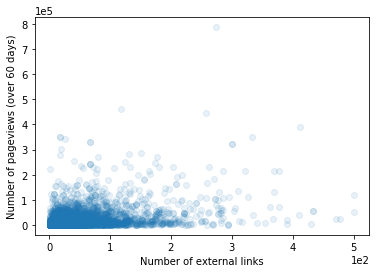

In [107]:
plt.scatter(x=extlinks[(extlinks != 0)], y=pageviews[(extlinks != 0)], alpha=0.1)
plt.xlabel('Number of external links')
plt.ylabel('Number of pageviews (over 60 days)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('Scatterplot.png', dpi=300)

In [111]:
print('Maximum:', np.max(pageviews[pageviews != 0]))
print('75th quantile:', np.quantile(pageviews[pageviews != 0], 0.75))
print('Median:', np.median(pageviews[pageviews != 0]))
print('25th quantile:', np.quantile(pageviews[pageviews != 0], 0.25))
print('Minimum:', np.min(pageviews[pageviews != 0]))
print('Mean:', np.mean(pageviews[pageviews!=0]))

Maximum: 787314
75th quantile: 7345.0
Median: 1674.0
25th quantile: 402.0
Minimum: 3
Mean: 10137.040524893864


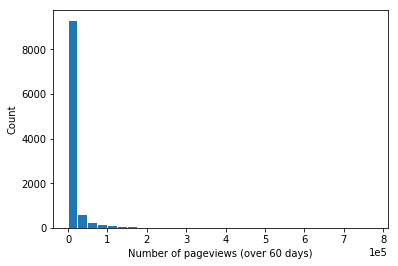

In [108]:
plt.hist(pageviews[pageviews != 0], rwidth=0.9, bins=np.arange(3, 787314, 100000 * 0.25))
# plt.xticks(bins[::100])
plt.xlabel('Number of pageviews (over 60 days)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel('Count')
plt.savefig('Histogram of pageviews.png', dpi=300)

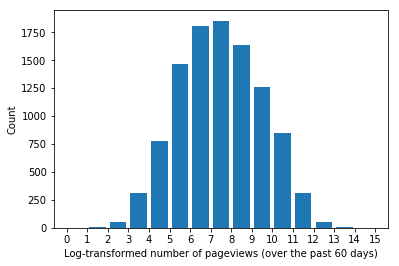

In [29]:
_, bins, _ = plt.hist(np.log(pageviews[pageviews != 0]), rwidth=0.8, bins=np.arange(0, 16, 1))
plt.xticks(bins)
plt.xlabel('Log-transformed number of pageviews (over the past 60 days)')
plt.ylabel('Count')
plt.savefig('Histogram of log-transformed pageviews.png', dpi=300)

In [112]:
print('Maximum:', np.max(extlinks[extlinks != 0]))
print('75th quantile:', np.quantile(extlinks[extlinks != 0], 0.75))
print('Median:', np.median(extlinks[extlinks != 0]))
print('25th quantile:', np.quantile(extlinks[extlinks != 0], 0.25))
print('Minimum:', np.min(extlinks[extlinks != 0]))
print('Mean:', np.mean(extlinks[extlinks!=0]))

Maximum: 501
75th quantile: 30.0
Median: 13.0
25th quantile: 6.0
Minimum: 1
Mean: 27.484610617640982


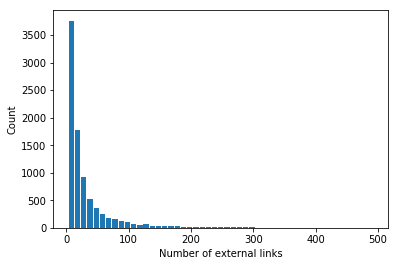

In [28]:
plt.hist(extlinks[extlinks != 0], rwidth=0.85, bins=np.arange(3, 501, 10))
# plt.xticks(bins[::100])
plt.xlabel('Number of external links')
plt.ylabel('Count')
plt.savefig('Histogram of external links.png', dpi=300)

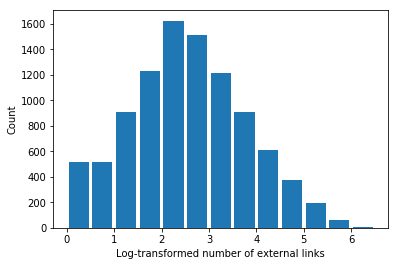

In [27]:
plt.hist(np.log(extlinks[extlinks != 0]), rwidth=0.85, bins=np.arange(0, 7, 0.5))
plt.xlabel('Log-transformed number of external links')
plt.ylabel('Count')
plt.savefig('Histogram of log-transformed external links.png', dpi=300)

In [345]:
from scipy.stats.stats import pearsonr   
pearsonr(np.log(extlinks[(extlinks != 0) & (pageviews != 0)]), 
         np.log(pageviews[(extlinks != 0) & (pageviews != 0)]))
# give 95% interval for the correlation

(0.477310239239384, 0.0)

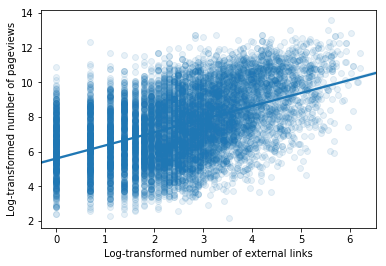

In [46]:
sns.regplot(x=np.log(extlinks[(extlinks != 0) & (pageviews != 0)]), 
            y=np.log(pageviews[(extlinks != 0) & (pageviews != 0)]),
            scatter_kws={'alpha': 0.1})
plt.xlabel('Log-transformed number of external links')
plt.ylabel('Log-transformed number of pageviews')
plt.savefig('Regplot.png')
# in extensions say more, this is enough
# change dot size to be more visible
# consider credibility as a utility function of citations
# derive the power law curve
# question to be considered

In [51]:
from sklearn.linear_model import LinearRegression

In [87]:
X = np.expand_dims(np.array(np.log(extlinks[(extlinks != 0) & (pageviews != 0)])), axis=1)
y = np.expand_dims(np.array(np.log(pageviews[(extlinks != 0) & (pageviews != 0)])), axis=1)

In [75]:
reg = LinearRegression().fit(X, y)

In [83]:
slope, intercept = reg.coef_[0][0], reg.intercept_[0]
print('slope:', reg.coef_[0][0])
print('intercept:', reg.intercept_[0])
print('No need for confidence interval because we have all data')

slope: 0.755440233447897
intercept: 5.6114543808703425
No need for confidence interval because we have all data


In [114]:
reg.score(X, y)

0.22782506448275808

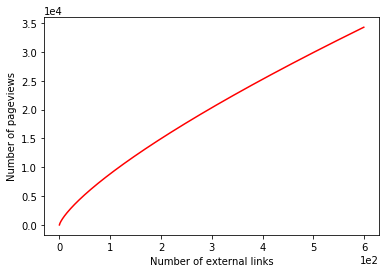

In [118]:
y_pred = (np.arange(0, 600, 1) ** slope) * (np.e ** intercept)
plt.plot(np.arange(0, 600, 1), y_pred, color='r')
plt.xlabel('Number of external links')
plt.ylabel('Number of pageviews')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Model.png', dpi=300)

In [89]:
np.e

2.718281828459045

In [ ]:
>>> import numpy as np
>>>
>>> import statsmodels.api as sm
>>>
>>> Y = [1,3,4,5,2,3,4]
>>> X = range(1,8)
>>> X = sm.add_constant(X)
>>>
>>> model = sm.OLS(Y,X)
>>> results = model.fit()
>>> results.params
array([ 2.14285714,

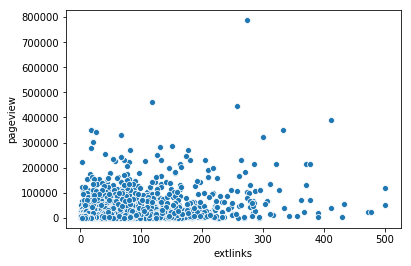

In [338]:
sns.scatterplot(x=extlinks[(extlinks != 0) & (pageviews != 0)], 
            y=pageviews[(extlinks != 0) & (pageviews != 0)])


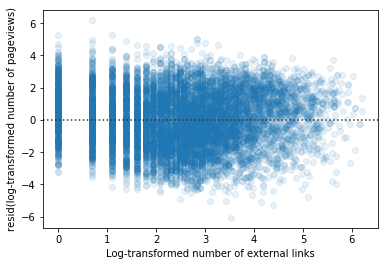

In [119]:
sns.residplot(x=np.log(extlinks[(extlinks != 0) & (pageviews != 0)]), 
              y=np.log(pageviews[(extlinks != 0) & (pageviews != 0)]),
              scatter_kws={'alpha': 0.1})
plt.xlabel('Log-transformed number of external links')
plt.ylabel('resid(log-transformed number of pageviews)')
plt.savefig('Resid plot.png')

In [ ]:
# maybe be more flexible for the properties to look for

# base case: just geet the first data and continue data
# while continue data is not stopped:
#     get data
#     append to the dictionary

In [27]:
np.all([True, True, True, True, True])

True

In [28]:
i = True

In [29]:
i is True

True

In [30]:
some_dict = {'a':1, 'b':2}

In [32]:
some_dict.items()

dict_items([('a', 1), ('b', 2)])

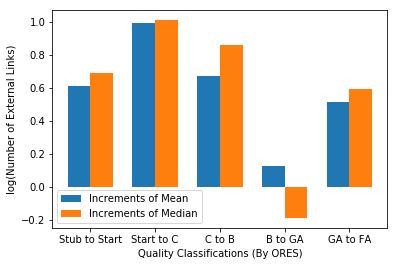

In [47]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
extlinks_means = (0.609245, 0.993014, 0.67286 , 0.122741, 0.517268)
extlinks_medians = (0.693148,  1.0116  ,  0.860202, -0.190044,  0.595509)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, extlinks_means, width, label='Increments of Mean')
plt.bar(ind + width, extlinks_medians, width, label='Increments of Median')

plt.ylabel('log(Number of External Links)')
plt.xlabel('Quality Classifications (By ORES)')

plt.xticks(ind + width / 2, ('Stub to Start', 'Start to C', 'C to B', 'B to GA', 'GA to FA'))
plt.legend(loc='best')
plt.savefig('External Links Mean And Median Increment Barplot.png', dpi=300)

In [31]:
pageview_means = np.array([float(i) for i in '5.935295 7.063645 8.180578 8.836990 8.899478 9.543938'.split(' ')])
pageview_medians = np.array([float(i) for i in '5.910797 7.067746 8.236421 8.950662 9.012986 9.759848'.split(' ')]) 

In [40]:
np.concatenate((np.array([0]), np.array([1,2,3])))

array([0, 1, 2, 3])

In [32]:
def get_diff(array):
    return array[1:] - array[0:-1]

In [33]:
pageview_means_diffs = get_diff(pageview_means)
pageview_medians_diffs = get_diff(pageview_medians)

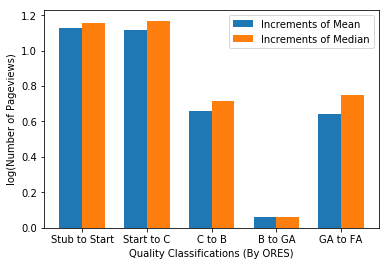

In [49]:
import numpy as np
import matplotlib.pyplot as plt

N = 5

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, pageview_means_diffs, width, label='Increments of Mean')
plt.bar(ind + width, pageview_medians_diffs, width, label='Increments of Median')

plt.ylabel('log(Number of Pageviews)')
plt.xlabel('Quality Classifications (By ORES)')

plt.xticks(ind + width / 2, ('Stub to Start', 'Start to C', 'C to B', 'B to GA', 'GA to FA'))
plt.legend(loc='best')
plt.savefig('Pageview Mean And Median Increment Barplot.png', dpi=300)